## Linear regression with sklearn 

In [1]:
import numpy as np
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
X = boston.data
y = boston.target

In [11]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1016)

In [16]:
## model fitting
from sklearn.linear_model import LinearRegression

In [17]:
model_lr_sk = LinearRegression(fit_intercept=True)  # 상수항 옵션
model_lr_sk = model_lr_sk.fit(X_train, y_train)

In [18]:
model_lr_sk.coef_
model_lr_sk.intercept_

44.57488770378734

In [19]:
y_pred = model_lr_sk.predict(X_test)

In [20]:
mse = np.mean((y_test - y_pred)**2)

In [21]:
mse

16.17941821807036

In [23]:
y_pred[:10]

array([14.31606279, 20.85429581, 23.05769965, 22.62225968, 29.51511445,
       23.8247533 , 15.85991511, 16.04193992, 28.75789131, 32.48080607])

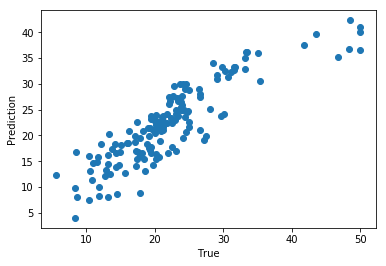

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test, y_pred)
plt.xlabel('True')
plt.ylabel('Prediction')
plt.show()

## Linear Regression with statsmodels

In [24]:
import statsmodels.api as sm
import pandas as pd

## data -> dataframe 형태 & 상수항 추가
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0) #constant
dfX.head()
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

/Users/sanghyub/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/sanghyub/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/sanghyub/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [25]:
dfX_train, dfX_test, dfy_train, dfy_test = train_test_split(dfX, dfy, test_size=0.3, random_state=1016)

In [26]:
model_lr_sm = sm.OLS(dfy_train, dfX_train)
model_lr_sm = model_lr_sm.fit()

print(model_lr_sm.summary())
model_lr_sm.params

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     68.49
Date:                Tue, 16 Oct 2018   Prob (F-statistic):           1.35e-86
Time:                        21:34:55   Log-Likelihood:                -1070.6
No. Observations:                 354   AIC:                             2169.
Df Residuals:                     340   BIC:                             2223.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.5749      6.510      6.847      0.0

const      44.574888
CRIM       -0.087171
ZN          0.053015
INDUS      -0.025202
CHAS        2.603826
NOX       -21.626150
RM          3.148816
AGE         0.005522
DIS        -1.787671
RAD         0.343970
TAX        -0.012536
PTRATIO    -0.992308
B           0.010685
LSTAT      -0.571065
dtype: float64

In [27]:
y_pred = model_lr_sm.predict(dfX_test)

# mse 산출
mse = np.mean((dfy_test.MEDV - y_pred)**2)

In [28]:
mse

16.179418218070005

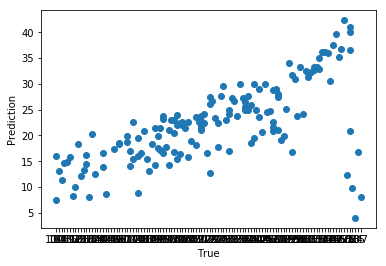

In [29]:
# plot
plt.scatter(dfy_test, y_pred)
plt.xlabel('True')
plt.ylabel('Prediction')
plt.show()

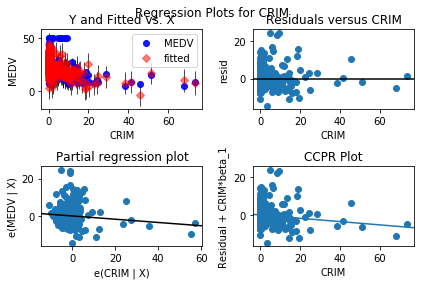

In [30]:
fig = sm.graphics.plot_regress_exog(model_lr_sm, 'CRIM')

## Logistic Regression on Titanic

In [31]:
import pandas as pd

In [32]:
df = pd.read_csv('./all/train.csv')

In [33]:
cols_to_keep = ['Survived','Age','Fare']

In [38]:
dummy_Pclass = pd.get_dummies(df['Pclass'], prefix='Pclass')
dummy_Sex = pd.get_dummies(df['Sex'], prefix='Sex')
dummy_Pclass.head()
dummy_Sex.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [39]:
# 종속변수&설명변수 데이터 생성
dfXy = df[cols_to_keep].join(dummy_Pclass.ix[:, 'Pclass_2':])  # dummy 특성상 Pclass_2 부터 이어 붙임, 비상관성 만족하기 위해
# 변수 2개로 3개를 표현함
dfXy = dfXy.join(dummy_Sex.ix[:, 'Sex_male':])  # dummy 특성상 Sex_male만 이어 붙임

/Users/sanghyub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/sanghyub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
dfXy.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male
0,0,22.0,7.2500,0,1,1
1,1,38.0,71.2833,0,0,0
2,1,26.0,7.9250,0,1,0
3,1,35.0,53.1000,0,0,0
4,0,35.0,8.0500,0,1,1


In [61]:
del dfXy['intercept']

In [70]:
dfXy['intercept'] = 1.0 

In [71]:
dfXy.isnull().sum()
dfXy = dfXy.dropna()

In [72]:
dfXy.shape

(714, 7)

In [73]:
# data split
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(dfXy, test_size=0.3, random_state=1016)

In [74]:
## model fitting
X_cols = df_train.columns[1:]  # 설명 변수
model_logit = sm.Logit(df_train['Survived'], df_train[X_cols])
model_logit = model_logit.fit()

Optimization terminated successfully.
         Current function value: 0.445017
         Iterations 6


In [75]:
## testing
y_pred = model_logit.predict(df_test[X_cols])  # 생존 확률 예측값

In [76]:
cut_off = 0.5
y_pred_bn = [int(x>=cut_off) for x in y_pred]  # 생존 class 예측값

In [77]:
import sklearn.metrics as skm
cm = skm.confusion_matrix(df_test['Survived'].values, y_pred_bn)  # confusion matrix
acc = skm.accuracy_score(df_test['Survived'].values, y_pred_bn)  # accuracy
report = skm.precision_recall_fscore_support(df_test['Survived'].values, y_pred_bn)  # precision, recall, f1-measure

In [82]:
cm

array([[107,  24],
       [ 24,  60]])

In [69]:
report #without intercept
#1기준 #0기준

(array([0.77857143, 0.70666667]),
 array([0.83206107, 0.63095238]),
 array([0.80442804, 0.66666667]),
 array([131,  84]))

In [78]:
report #with intercept

(array([0.81679389, 0.71428571]),
 array([0.81679389, 0.71428571]),
 array([0.81679389, 0.71428571]),
 array([131,  84]))

In [81]:
y_pred

784    0.093183
376    0.630463
640    0.108905
136    0.957260
805    0.076875
131    0.109003
771    0.043995
170    0.255326
514    0.096124
182    0.148315
855    0.661748
205    0.773436
60     0.102389
421    0.105580
366    0.834400
282    0.122979
682    0.108738
843    0.068754
842    0.938155
257    0.933978
287    0.102312
525    0.056416
838    0.070321
56     0.875088
195    0.831631
577    0.914825
449    0.320237
183    0.475851
193    0.462550
307    0.955839
         ...   
488    0.079362
775    0.115876
516    0.816564
833    0.099157
96     0.194555
668    0.051930
94     0.030424
734    0.303353
655    0.280419
255    0.569537
339    0.374070
245    0.366216
496    0.860882
401    0.090173
854    0.754899
97     0.554180
51     0.105572
455    0.081963
188    0.056826
604    0.461400
803    0.194692
716    0.899616
437    0.861963
789    0.353278
424    0.114279
654    0.662480
309    0.936235
311    0.945152
156    0.677628
542    0.708412
Length: 215, dtype: floa

In [80]:
model_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            No. Iterations:   6.0000  
Dependent Variable: Survived         Pseudo R-squared: 0.344   
Date:               2018-10-16 21:58 AIC:              456.1265
No. Observations:   499              BIC:              481.4021
Df Model:           5                Log-Likelihood:   -222.06 
Df Residuals:       493              LL-Null:          -338.26 
Converged:          1.0000           Scale:            1.0000  
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
Age        -0.0349    0.0094   -3.7158  0.0002  -0.0533  -0.0165
Fare       -0.0013    0.0030   -0.4150  0.6782  -0.0072   0.0047
Pclass_2   -1.1123    0.3834   -2.9011  0.0037  -1.8638  -0.3608
Pclass_3   -2.4940    0.4025   -6.1965  0.0000  -3.2829  -1.7052
Sex_male   -2.7052    0.2535  -10.6725  0.0000  -3.2020  -2.2084
intercept   3.8048    0.5823    6.5343  0.0000   2.6635   4.9460
===============================================================

"""